In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # for removing warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("First_Health_Camp_Attended.csv")

In [5]:
df

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
...,...,...,...,...,...
6213,502728,6575,10,0.509804,NaN
6214,511088,6575,20,0.078431,NaN
6215,507608,6575,40,0.627451,NaN
6216,488046,6575,50,0.686275,NaN


In [6]:
result = df.head(10)

In [7]:
result

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
5,492080,6560,40,0.658537,NaN
6,521555,6560,30,0.536585,NaN
7,493258,6560,30,0.121951,NaN
8,515459,6560,20,0.463415,NaN
9,504261,6560,30,0.878049,NaN


In [8]:
df.info()                      #Information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      6218 non-null   int64  
 1   Health_Camp_ID  6218 non-null   int64  
 2   Donation        6218 non-null   int64  
 3   Health_Score    6218 non-null   float64
 4   Unnamed: 4      0 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 243.0 KB


In [9]:
cols = ['Unnamed: 4']       #Data Pre-processing
df = df.drop(cols, axis=1)

In [10]:
df

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390
...,...,...,...,...
6213,502728,6575,10,0.509804
6214,511088,6575,20,0.078431
6215,507608,6575,40,0.627451
6216,488046,6575,50,0.686275


In [11]:
df.dtypes    #finding all the datatypes

Patient_ID          int64
Health_Camp_ID      int64
Donation            int64
Health_Score      float64
dtype: object

In [12]:
df['Health_Score'] = df['Health_Score'].fillna(0).astype(int) #converting float datatype into int  dtype
print(df.dtypes)

Patient_ID        int64
Health_Camp_ID    int64
Donation          int64
Health_Score      int32
dtype: object


In [13]:
df.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score'], dtype='object')

In [14]:
df.Health_Camp_ID.value_counts()  #value count function

6543    826
6538    625
6586    600
6537    481
6542    362
6554    346
6570    276
6532    262
6580    260
6539    254
6535    252
6585    203
6571    195
6540    140
6526    140
6563    117
6569    112
6581     89
6562     89
6531     79
6561     55
6524     54
6575     51
6564     49
6552     43
6530     42
6565     41
6560     41
6587     36
6557     36
6558     20
6546     18
6544     13
6553     11
Name: Health_Camp_ID, dtype: int64

In [15]:
# bar plot wala big doubt 

In [16]:
x =np.array(['Patient_ID','Health_Camp_ID','Donation','Health_Score'])
y=np.array([8,34,28,44])


<BarContainer object of 4 artists>

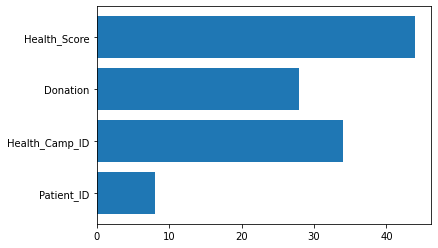

In [17]:
plt.barh(x,y)           #camps by quarter   #h means horizontal

<AxesSubplot:xlabel='Patient_ID'>

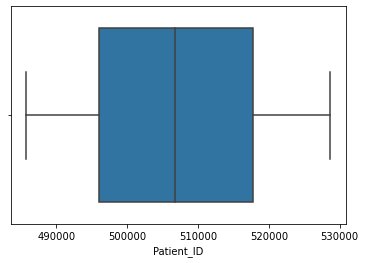

In [18]:
#camp duration distribution (Use Boxplot for finding out the outliers)
sns.boxplot(df.Patient_ID)

<AxesSubplot:xlabel='Donation'>

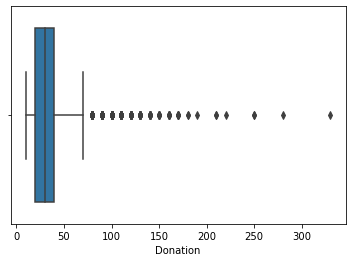

In [19]:
 sns.boxplot(df.Donation	)
#outliers are there in donation camp.

In [20]:
Q1,Q3=df['Donation'].quantile([.25,.75])

In [21]:
Q1,Q3

(20.0, 40.0)

In [22]:
df.describe()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
count,6218.000000,6218.000000,6218.000000,6218.000000
mean,506929.053715,6552.904149,32.587649,0.005629
std,12437.711002,19.095027,24.501676,0.074820
min,485702.000000,6524.000000,10.000000,0.000000
25%,496069.000000,6538.000000,20.000000,0.000000
50%,506704.000000,6543.000000,30.000000,0.000000
75%,517747.750000,6570.000000,40.000000,0.000000
max,528657.000000,6587.000000,330.000000,1.000000


In [23]:
IQR=Q3-Q1

In [24]:
IQR

20.0

In [25]:
LL=Q1-1.5*(IQR)# LL UL FORMULAS # bodmass 
UL=Q3+1.5*(IQR) 

In [26]:
LL

-10.0

In [27]:
UL

70.0

In [28]:
df['Donation'] =np .where(df['Donation']>UL,UL,df['Donation'])

<AxesSubplot:xlabel='Donation'>

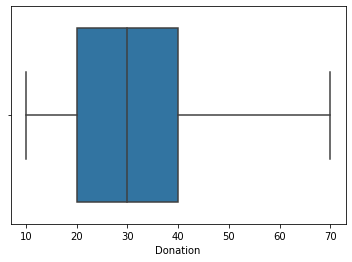

In [29]:
sns.boxplot(df.Donation)      # outliers remove

In [30]:
df.Patient_ID.info

<bound method Series.info of 0       506181
1       494977
2       518680
3       509916
4       488006
         ...  
6213    502728
6214    511088
6215    507608
6216    488046
6217    508766
Name: Patient_ID, Length: 6218, dtype: int64>

In [31]:
df.Donation.value_counts() 

20.0    1609
10.0    1316
30.0    1250
40.0     760
70.0     527
50.0     473
60.0     283
Name: Donation, dtype: int64

In [32]:
df.Health_Score.value_counts(normalize=True).round((2)) 
#kitne unknown h to check percentage wala

0    0.99
1    0.01
Name: Health_Score, dtype: float64

Text(0.5, 1.0, 'Donation')

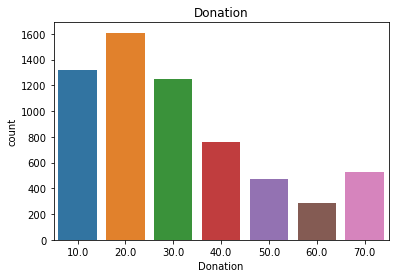

In [33]:
sns.countplot(df.Donation).set_title('Donation')
#for putting title is   #data distribution

<AxesSubplot:>

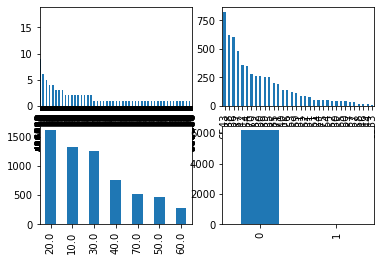

In [40]:

plt.subplot(2,2,1)     
df['Patient_ID'].value_counts().plot(kind='bar')

plt.subplot(2,2,2)     
df['Health_Camp_ID'].value_counts().plot(kind='bar')

plt.subplot(2,2,3)     
df['Donation'].value_counts().plot(kind='bar')

plt.subplot(2,2,4)     
df['Health_Score'].value_counts().plot(kind='bar')

In [35]:
df.isnull().sum()

Patient_ID        0
Health_Camp_ID    0
Donation          0
Health_Score      0
dtype: int64

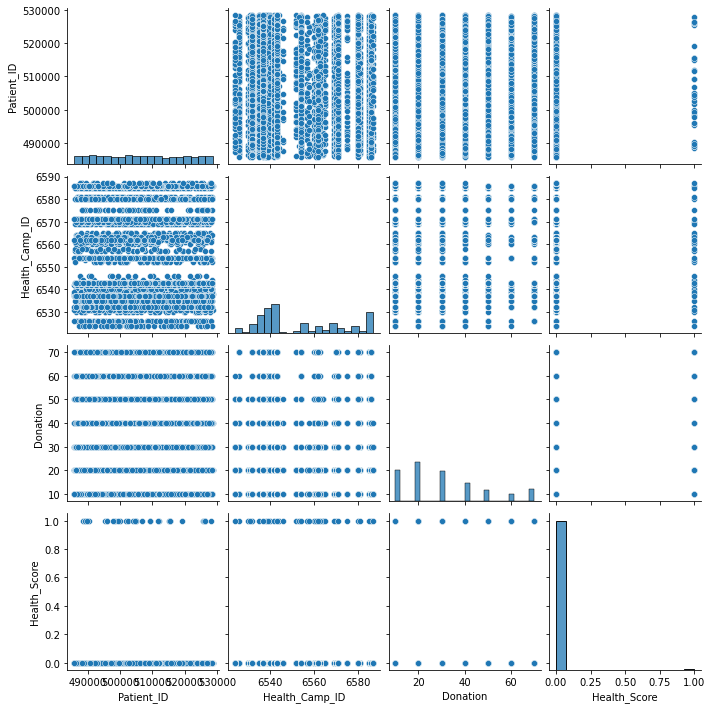

In [36]:
sns.pairplot(df,palette=['Green','blue']) # linear means towards upwards

In [37]:
df

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40.0,0
1,494977,6560,20.0,0
2,518680,6560,10.0,0
3,509916,6560,30.0,0
4,488006,6560,20.0,0
...,...,...,...,...
6213,502728,6575,10.0,0
6214,511088,6575,20.0,0
6215,507608,6575,40.0,0
6216,488046,6575,50.0,0
